클러스터링은 독립변수 특성이 유사한 데이터 그룹으로 cluster를 구분하는 것.
- 비지도 학습

# K-means
가장 단순하고 빠름

1. 임의의 중심값 $\mu_k$ 선택
1. 중심에서 각 샘플 데이터까지 거리 계산
1. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
1. 다시 만들어진 클러스터의 중심 계산. 1-4 반복


- K의 값을 정해줘야함

다음과 같은 목적함수 값이 최소화될때까지 중심과 클러스터를 찾음.
$$J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)$$

여기서의 $d$는 두 데이터의 비유사도, 혹은 거리
$$d(x_i, \mu_k) = || x_i - \mu_k ||^2$$

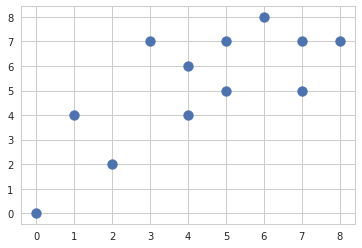

In [1]:
%matplotlib inline
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

## 1회 

In [2]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=1, random_state=1).fit(X)

In [3]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

In [4]:
model1.score(X)

-63.00408163265304

In [5]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

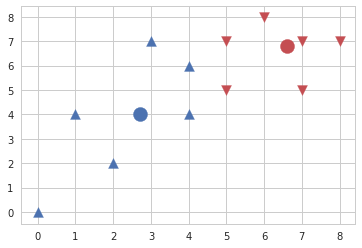

In [6]:
plot_cluster(model1, c0, c1)

## 5회

In [7]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=5, random_state=1).fit(X)

In [8]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([5.625, 6.5  ]), array([1.75, 2.5 ]))

In [9]:
model1.score(X)

-47.625

In [10]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

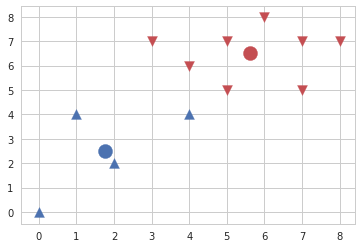

In [11]:
plot_cluster(model1, c0, c1)

## K-means ++
최초 중심값을 설정하기 위한 알고리즘

1. 중심값 저장할 집합 M
1. 랜덤하게 하나의 중심을 M에 입력
1. M에 속하지 않는 모든 샘플에 대해 거리 $d(M, x_i)$ 계산
1. $d(M, x_i)$ 는 M안에 모든 샘플 $\mu_k$에 대해 $d(\mu_k, x_i)$이 가장 작은 값 선택
1. $d(M, x_i)$에 비례한 `확률`로 다음 중심 $\mu$ 선택
1. K개 중심 선택할 때까지 반복
1. K-means 알고리즘 반복

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(
        np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

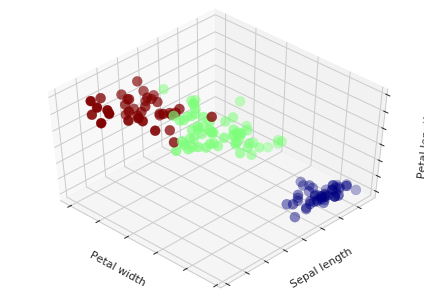

In [16]:
model3 = KMeans(n_clusters=3)
plot_iris_cluster(model3)